# Bussiness Issue

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

# 0.0 Imports

## 0.1 Helper FUnctions

## 0.2 Loading data

In [66]:
import pandas as pd
import inflection
import math
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

In [37]:
%pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_train =pd.read_csv('rossmann-store-sales/train.csv',parse_dates=[2], low_memory= False)
df_test =pd.read_csv('rossmann-store-sales/test.csv')
df_store =pd.read_csv('rossmann-store-sales/store.csv')

In [3]:
#merge
df_raw = pd.merge(df_train, df_store, how ='left', on ='Store')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


# 1.0 Descriptions

In [6]:
#Fazer um copia em cada sessão em caso de precisar da base inicial da sessao
df1 = df_raw.copy()

## 1.1 Rename Columns

In [7]:
cols_old = df1.columns

snakecase = lambda x : inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new


## 1.2 Data Dimensions /  Types / Check NA

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

## 1.3 Fillout NA
opçẽos : 1 - excliur
         2 - ML baseado no comportamento de NA, media, Regressao, etc
         3 - pensando no negócio, o que faz sentido no contexto dos problemas

In [9]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
573850,411,7,2014-02-02,0,0,0,0,0,0,d,c,8460.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
#competition_distance          1014567 non-null  float64
#df1.competition_distance.max() = 75860.0
df1.competition_distance =  df1.competition_distance.apply(lambda x: 400000 if math.isnan(x) 
                                                            else x)


In [11]:
#competition_open_since_month  693861 non-null   float64  
df1.competition_open_since_month =  df1.apply(lambda x: x.date.month if math.isnan(x.competition_open_since_month)
                                               else x.competition_open_since_month, axis =1 )
     

In [12]:
#competition_open_since_year   693861 non-null   float64  

df1.competition_open_since_year =  df1.apply(lambda x: x.date.year if math.isnan(x.competition_open_since_year)
                                               else x.competition_open_since_year, axis =1 )

In [13]:
#promo2_since_week             509178 non-null   float64  
df1.promo2_since_week =  df1.apply(lambda x: x.date.week if math.isnan(x.promo2_since_week)
                                               else x.promo2_since_week, axis =1 )


In [14]:
#promo2_since_year             509178 non-null   float64      
df1.promo2_since_year =  df1.apply(lambda x: x.date.year if math.isnan(x.promo2_since_year)
                                               else x.promo2_since_year, axis =1 )


In [15]:
#promo_interval                509178 non-null   object   
month_map = {1: 'Jan', 
             2: 'Feb', 
             3: 'Mar', 
             4: 'Apr', 
             5: 'May', 
             6: 'Jun', 
             7: 'Jul', 
             8: 'Aug', 
             9: 'Sept', 
             10: 'Oct',
             11: 'Nov', 
             12: 'Dec'}

df1.promo_interval.fillna(0, inplace = True)

df1['month_map'] = df1.date.dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 
                                                             if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [16]:
df1.sample(5).T

,597706,415756,788526,229868,206699
store,852,647,1007,179,425
day_of_week,7,2,4,2,2
date,2014-01-12 00:00:00,2014-06-24 00:00:00,2013-07-25 00:00:00,2015-01-06 00:00:00,2015-01-27 00:00:00
sales,0,3957,4678,9498,3705
customers,0,534,605,1214,478
open,0,1,1,1,1
promo,0,0,0,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,1,1,0
store_type,c,a,c,a,d


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

## 1.4 Change Types


In [18]:
df1.competition_open_since_month =df1.competition_open_since_month.astype(int)
df1.competition_open_since_year =df1.competition_open_since_year.astype(int)

df1.promo2_since_week =df1.promo2_since_week.astype(int)
df1.promo2_since_year =df1.promo2_since_year.astype(int)

## 1.5 Descriptive Statistical



In [28]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64','datetime64[ns]'])

### NUMERICAL DATA
df1.describe()

In [35]:
num_attributes.skew(), num_attributes.kurtosis()

(store                           -0.000955
 day_of_week                      0.001593
 sales                            0.641460
 customers                        1.598650
 open                            -1.758045
 promo                            0.487838
 school_holiday                   1.677842
 competition_distance            16.023065
 competition_open_since_month    -0.042076
 competition_open_since_year     -7.235657
 promo2                          -0.002255
 promo2_since_week                0.178723
 promo2_since_year               -0.784436
 is_promo                         1.739838
 dtype: float64,
 store                            -1.200524
 day_of_week                      -1.246873
 sales                             1.778375
 customers                         7.091773
 open                              1.090723
 promo                            -1.762018
 school_holiday                    0.815154
 competition_distance            288.268177
 competition_open_since_month

/home/natalia-mesquita/Desktop/repos/01.ds_em_prod/ds_em_producao/dsemprod/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

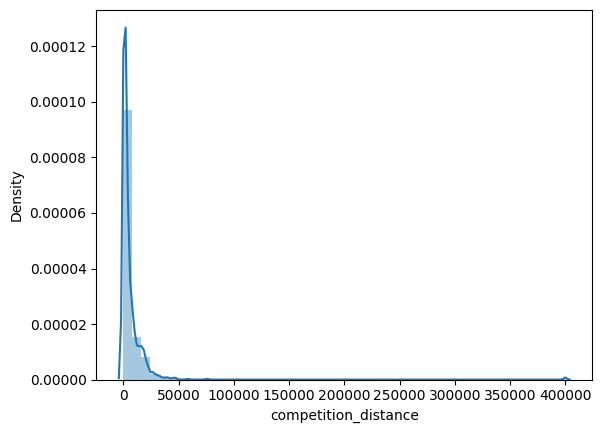

In [64]:
#poisson skew alta e kurtosis alta
sns.distplot(df1.competition_distance)

/home/natalia-mesquita/Desktop/repos/01.ds_em_prod/ds_em_producao/dsemprod/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='promo2_since_week', ylabel='Density'>

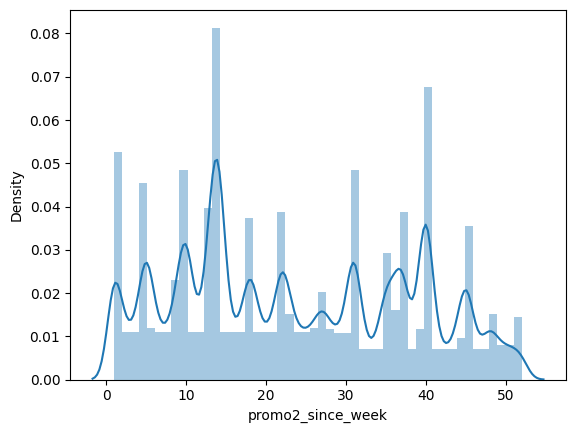

In [52]:
#poisson skew alta e kurtosis alta
sns.distplot(df1.promo2_since_week)

### Categorical descriotion is BOXPLOT


In [45]:
cat_attributes.apply(lambda x:x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

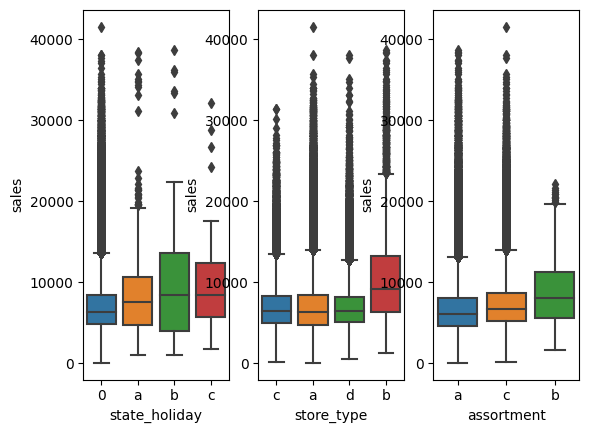

In [70]:

aux1=df1[(df1.state_holiday != 0)&(df1.sales>0)]

plt.subplot(1,3,1)
sns.boxplot(x = aux1.state_holiday, y= aux1.sales);

plt.subplot(1,3,2)
sns.boxplot(x = aux1.store_type, y= aux1.sales);

plt.subplot(1,3,3)
sns.boxplot(x = aux1.assortment, y= aux1.sales);

# Mental Hipotesys map

Fenomenos
ex: vendas

Agentes
ex: lojas, preço, clientes

Atributos
ex:cada agente tes caracteristicas lojas tme tamanho, localização, etc

Lista de Hipotese:
Surpresa ou Contra Intuição

# 2.0 Passo 2  - Feature Engineering

In [74]:
from IPython.display import Image 

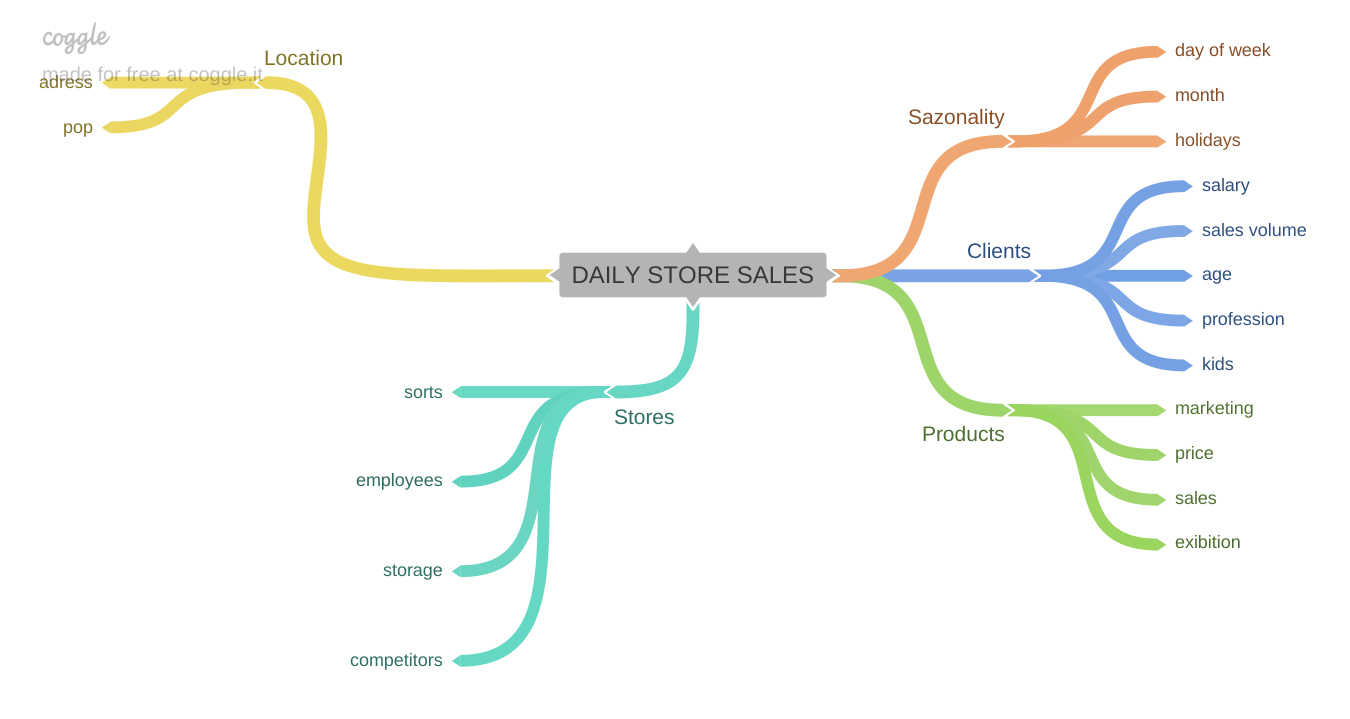

In [77]:
Image('img/DAILY_STORE_SALES.png')

## 2.1Mind Map Hypotesis

### 2.1.1 Store Hypotesis

**1.** Lojas com maior quadro de funcionarios vendem mais

**2.** Lojas com maior estoque vendem mais

**3.** Lojas com maior porte vendem mais

**4.** Lojas com maior sortimento venddem mais ok

### 2.1.2 Procduct Hypotesis

**1.** Lojas que investem em Marketing vendem mais

**2.** Lojas com mais produtor na vitrine vendem mais

**3.** Lojas com menor preço dos produtos vendem mais

**4.** Lojas com menor preço com mais tempo nos produtos vendem mais ok

### 2.1.3 Sazonality Hypotesis

**1**. Lojas que tem mais feriados( day off) vendem menos

**2**. Lojas que abrem nos primeiros 6 meses vendem mais (verão e inverno)

**3**. Lojas que abrem nos fds vendem mais



## 2.2 Lista final de Hipoteses

Se ja tiver o dado para validar as hipoteses


1. Lojas com maior sortimentos deveriam vender mais.

2. Lojas com competidores mais próximos deveriam vender menos.

3. Lojas com competidores à mais tempo deveriam vendem mais.

4. Lojas com promoções ativas por mais tempo deveriam vender mais.

5. Lojas com mais dias de promoção deveriam vender mais.

7. Lojas com mais promoções consecutivas deveriam vender mais.

8. Lojas abertas durante o feriado de Natal deveriam vender mais.

9. Lojas deveriam vender mais ao longo dos anos.

10. Lojas deveriam vender mais no segundo semestre do ano.

11. Lojas deveriam vender mais depois do dia 10 de cada mês.

12. Lojas deveriam vender menos aos finais de semana.

13. Lojas deveriam vender menos durante os feriados escolares.


## 2.3 Feature Engineering



In [86]:
df2 = df1.copy()

In [91]:
#year
df2['year'] = df2.date.dt.year
#month
df2['year'] = df2.date.dt.month

#day
df2['year'] = df2.date.dt.day

#week of year
df2['year'] = df2.date.dt.isocalendar().week
#year week
df2['year'] = df2.date.dt.strftime('%Y-%W')


#competition since
df2['competition_since'] = df2.apply (lambda x: datetime.datetime(year = x.competition_open_since_year,
                                                                  month = x.competition_open_since_month,
                                                                  day =1, axis =1))
                                      
                                
#promo since

# assortment
#state holiday

NameError: name 'datetime' is not defined